# Author'd by 20PW02

### Feature Extraction

f(m,n) -> **`h(m,n) [Mask/Kernel]`** -> g(m,n) : 2 possibilities<br>

 - **Mask Processing**
 - **Spatial Domain Filtering**
 
**g(m,n) = f(m,n) * h(m,n)**
Here **(`*`)** is convolution operation, which has ability to perform **Filtering**, which in turn contains the ability to **extract feature** from image.

#### Case 1

`If h(m,n) == δ(m,n)`

Here,<br>

`δ(m,n) = { 1 if m=n=0, else 0 }`

Due to which : <br>

`g(m,n) = f(m,n) * h(m,n) = f(m,n)`


#### Steps

1. Read the image
2. Define **h(m,n)**
3. Perform conversion -> ***cv2.filter2d***
4. Display the result

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#step 1: reading the image
f = cv2.imread("cameraman.tif",0)

In [3]:
#step 2: Define the mask/kernel/h(m,n)
h = np.zeros([256,256])
h[128,128] = 1

In [4]:
#step 3: Performing the conversion
g = cv2.filter2D(f, -1, h)

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'),
 <matplotlib.image.AxesImage at 0x75f218144d40>)

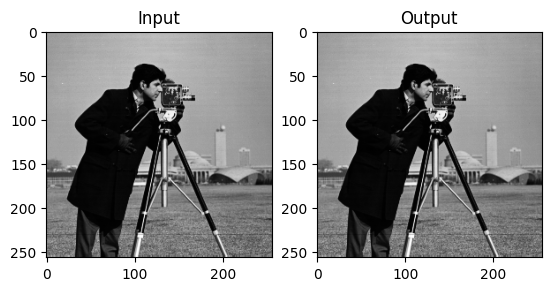

In [5]:
plt.subplot(1,2,1),plt.title('Input'),plt.imshow(f,cmap='gray')
plt.subplot(1,2,2),plt.title('Output'),plt.imshow(g,cmap='gray')

#### Inference

**Convolution of any function with impulse function will give the same function** [Called the mirror function]

### Changing the δ fucntion

Ways to change the del function :
- **δ(m-m<sub>0</sub>,n)**
- **δ(m,n-n<sub>0</sub>)**
- **δ(m-m<sub>0</sub>,n-n<sub>0</sub>)**

What this basically helps us do is **shift the image**

In [6]:
#step 1: reading the image
f = cv2.imread("cameraman.tif",0)

In [7]:
#step 2: Define the mask/kernel/h(m,n)
h = np.zeros([256,256])
h[1,1] = 1

In [8]:
#step 3: Performing the conversion
g = cv2.filter2D(f,-1,h)

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'),
 <matplotlib.image.AxesImage at 0x75f21800dac0>)

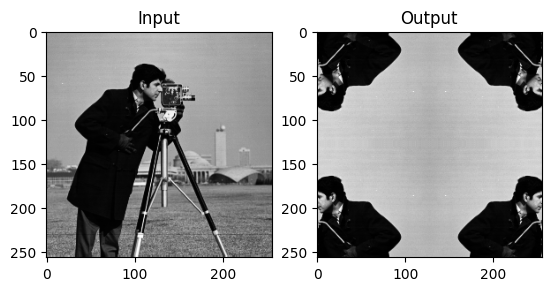

In [9]:
plt.subplot(1,2,1),plt.title('Input'),plt.imshow(f,cmap='gray')
plt.subplot(1,2,2),plt.title('Output'),plt.imshow(g,cmap='gray')

### Using h(m,n) as a low pass filter

A low pass filter always results in a **blurry image** [loss of detail].

**Eg:**
**h(m,n)** = 1/x * [[1,1,1][1,1,1],[1,1,1]] for any integer x

This is called the **Box Filter** or **Averaging Filter**

#### Steps
1. Generate the test image [drastic variation in intensity value].
2. Define the **box kernel**.
3. Perform Conversion
4. Display the result

In [10]:
#step 1: generating an image with extreme halves, ie, one white and one black half.
f = np.zeros([256,256])
f[0:256,0:128] = 255

In [11]:
#step 2: Define the box kernel
M = 11
h = 1/(M*M)*np.ones([M,M])

In [12]:
#step 3: Performing the conversion
g = cv2.filter2D(f,-1,h)

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'),
 <matplotlib.image.AxesImage at 0x75f20ff06990>)

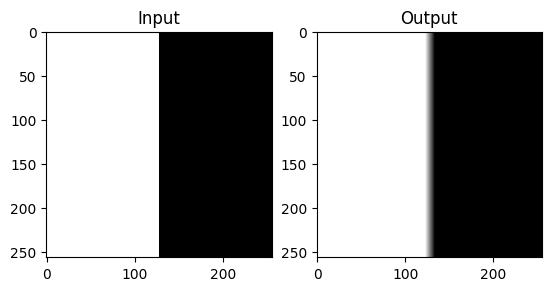

In [13]:
plt.subplot(1,2,1),plt.title('Input'),plt.imshow(f,cmap='gray')
plt.subplot(1,2,2),plt.title('Output'),plt.imshow(g,cmap='gray')

### Doing the same for Cameraman Image

In [14]:
#step 1: reading the image
f = cv2.imread("cameraman.tif",0)

In [15]:
#step 2: Define the box kernel
M = 21
h = 1/(M*M)*np.ones([M,M])

In [16]:
#step 3: Performing the conversion
g = cv2.filter2D(f,-1,h)

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'),
 <matplotlib.image.AxesImage at 0x75f20ff83950>)

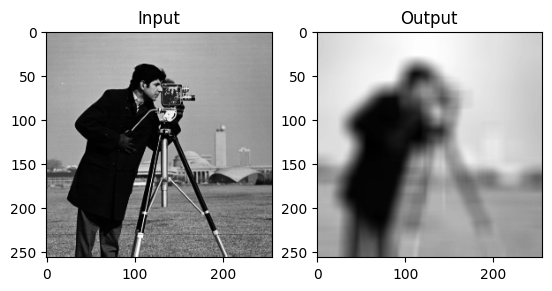

In [17]:
plt.subplot(1,2,1),plt.title('Input'),plt.imshow(f,cmap='gray')
plt.subplot(1,2,2),plt.title('Output'),plt.imshow(g,cmap='gray')

#### Inference

The boundary between the halves blurs, with intensity of the blur proportional to the value of M,ie, the size of the mask matrix<br>
=> **Blurriness of image/Impact on image ∝ Size of h matrix (M)**

### Weighted average

In [18]:
#step 1: reading the image
f = cv2.imread("cameraman.tif",0)

In [19]:
#step 2: Define the box kernel
M = 16
h = 1/(M*M) * np.array([[1,2,1],[2,4,2],[1,2,1]])

In [20]:
#step 3: Performing the conversion
g = cv2.filter2D(f,-1,h)

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'),
 <matplotlib.image.AxesImage at 0x75f20d567b90>)

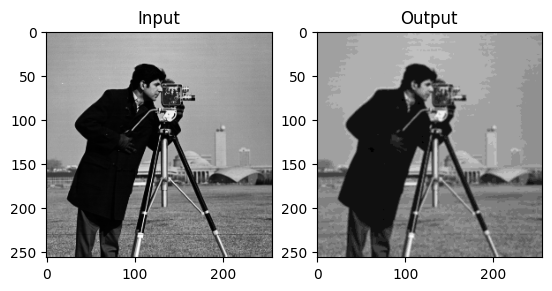

In [21]:
plt.subplot(1,2,1),plt.title('Input'),plt.imshow(f,cmap='gray')
plt.subplot(1,2,2),plt.title('Output'),plt.imshow(g,cmap='gray')

### Task -> Write a code to build the weighted average H matrix(Based on pascal triangle) and perform convolution for varius sizes of the matrix

### High Pass Filtering

**High Pass Filters** are also known as **Change Detector**.

Used to get **Fine Details** or **Edge Information**.

**Eg:**
**h(m,n)** = **[[0,-1,0],[1,-4,1],[0,-1,0]]**
- This filter is known as the **Laplacian Mask**

In [22]:
#step 1: reading the image
f = cv2.imread("cameraman.tif",0)

In [23]:
#step 2: Define the Laplacian Mask
h = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

In [24]:
#step 3: Performing the conversion
g = cv2.filter2D(f,-1,h)

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'),
 <matplotlib.image.AxesImage at 0x75f218075d00>)

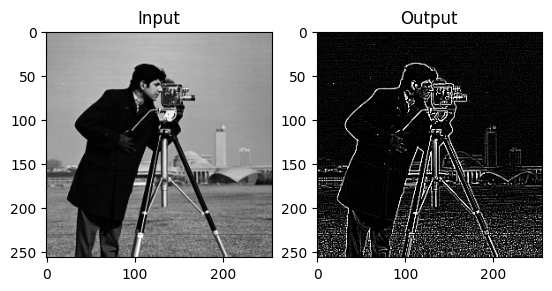

In [25]:
plt.subplot(1,2,1),plt.title('Input'),plt.imshow(f,cmap='gray')
plt.subplot(1,2,2),plt.title('Output'),plt.imshow(g,cmap='gray')

### High Pass Filer

#### Advantage
 - Edge Information is extracted
 
#### Disadvantage
 - Background information is lost
 
* **Low Pass Filter** - Sum of elements in h matrix is **one**.
* **High Pass Filter** - Sum of elements in h matrix is **zero**.

#### How to extract background Information
 - Using a **High Boost Filter** - Just change center element of high pass filter
 
* **Brightness** - Change in pixel value intensity 
* **Contrast** - Change in gray level of pixel

### High Boost Filter
- In below example only brightness is changed, not contrast

In [26]:
#step 1: reading the image
f = cv2.imread("cameraman.tif",0)

In [27]:
#step 2: Define the Laplacian Mask
h = np.array([[-1,-1,-1],[-1,11,-1],[-1,-1,-1]])

In [28]:
#step 3: Performing the conversion
g = cv2.filter2D(f,-1,h)

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'),
 <matplotlib.image.AxesImage at 0x75f20c10c530>)

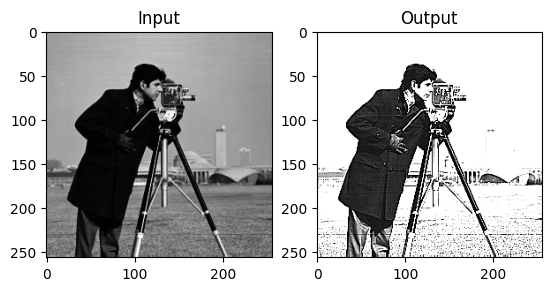

In [29]:
plt.subplot(1,2,1),plt.title('Input'),plt.imshow(f,cmap='gray')
plt.subplot(1,2,2),plt.title('Output'),plt.imshow(g,cmap='gray')

### Creating a HPF Mask - Fourier Transform

#### Steps
1. Create the HPF Mask
2. **FFT** : Gives 2 things - (magnitude,phase). We take **only Magnitude**.
3. Plot the magnitude of the Fourier Tranform

In [30]:
#step1 : HPF Mask
h = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

In [31]:
#step2 : take 2d fourier transform
H = np.fft.fftshift(np.fft.fft2(h))

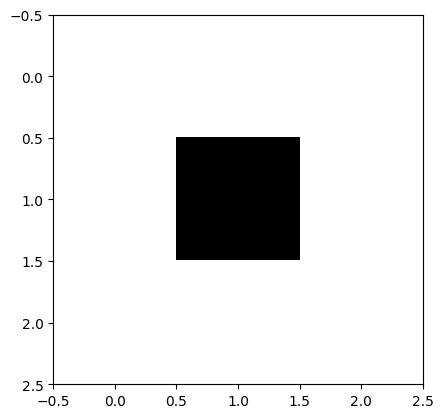

In [32]:
#step3 : Plot the mask
plt.imshow(np.abs(H),cmap='gray')

### LPF Mask - Fourier

In [33]:
#step1 : LPF Mask
h = np.array([[1,2,1],[2,4,2],[1,2,1]])

In [34]:
#step2 : take 2d fourier transform
H = np.fft.fftshift(np.fft.fft2(h)) #finding tranform and shifting to center

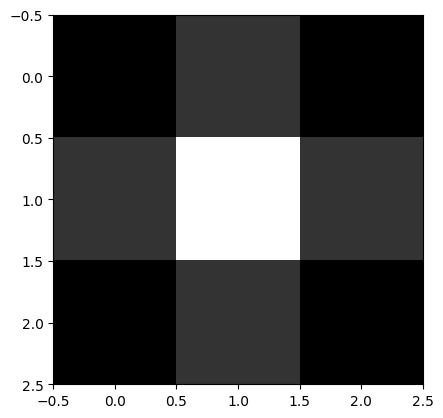

In [35]:
#step3 : Plot the mask
plt.imshow(np.abs(H),cmap='gray')  #using abs to remove phase comp(which is complex) and get only magnitude

* **HPF** & **LPF** are complementary to each other

**Fourier Tranform -> Complex No**

`z = a + jb`

here,

`|z| = sqrt(a^2 + b^2)`  => **np.abs()**<br>
`ϕ = sqrt(arctan(b/a))`  => **np.angle()**


Now, **Discrete Cosine Transform** is the standard used, which was first formulated by three Indians :
- Ahmed
- Rao
- Natarajan

It states : ***for a real number, you will always get a real number***<br>
It was taken up by the ***JPEG committee***

### Task: Use two masks : [[-1,0,1],[-1,0,1],[-1,0,1]] and [[-1,-1,-1],[0,0,0],[1,1,1]]. Try to infer the role played y both these masks.
### Task: Go for : [[1,0,0],[0,0,0],[0,0,-1]] after the above two and vary it wrt positions of 1 and -1 and try to infer the role the mask plays